In [114]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', None)
import plotly.express as px
import pathlib
import PIL
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

#Exploratory Data Analysis

In [2]:
# Class Labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [3]:
meta_df = pd.read_csv('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta.csv')

In [4]:
meta_df.sample(3)

Path  ClassId  ShapeId  ColorId SignId
32  Meta/38.png       38        1        1    4.7
23   Meta/3.png        3        1        0   3.29
41   Meta/8.png        8        1        0   3.29

In [5]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [6]:
test_df = pd.read_csv('C:/Users/HP/Documents/Codebasics/GTSCDS/Test.csv')

In [7]:
test_df.sample(3)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
3206     50      50       6       6      45      45        7  Test/03206.png
2322     40      44       5       6      34      38        7  Test/02322.png
5924     27      26       6       5      22      21        6  Test/05924.png

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [9]:
test_df['ClassId'] = test_df['ClassId'].astype(int)
test_df['Class_Label'] = test_df['ClassId'].map(classes)

In [10]:
test_df.sample(2)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path  \
6622     45      42       5       5      40      37       38  Test/06622.png   
5461     57      58       6       5      52      53        3  Test/05461.png   

               Class_Label  
6622            Keep right  
5461  Speed limit (60km/h)

In [11]:
fig = px.bar(test_df['Class_Label'].value_counts().reset_index(), x = 'Class_Label', y = 'count',
             width = 900, height = 700, labels = {'ClassId': 'Class Label', 'count': 'Number of images'}, title = 'Test image class distribution')
fig.show()

In [12]:
train_df = pd.read_csv('C:/Users/HP/Documents/Codebasics/GTSCDS/Train.csv')

In [13]:
train_df.sample(3)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
10054     29      29       5       6      24      24        5   
1717      30      31       5       5      25      26        1   
37652     49      48       6       5      44      42       38   

                                 Path  
10054   Train/5/00005_00054_00004.png  
1717    Train/1/00001_00038_00007.png  
37652  Train/38/00038_00055_00003.png

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [15]:
train_df['ClassId'] = train_df['ClassId'].astype(int)
train_df['Class_Label'] = train_df['ClassId'].map(classes)

In [16]:
train_df.sample(2)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
23419     52      53       5       6      46      47       15   
11466     31      31       5       5      26      26        7   

                                 Path            Class_Label  
23419  Train/15/00015_00000_00019.png            No vehicles  
11466   Train/7/00007_00025_00006.png  Speed limit (100km/h)

In [17]:
fig = px.bar(train_df['Class_Label'].value_counts().reset_index(), x = 'Class_Label', y = 'count',
             width = 1100, height = 700, labels = {'ClassId': 'Class Label', 'count': 'Number of images'}, title = 'Train image class distribution')
fig.show()

In [18]:
data_dir = pathlib.Path("C:/Users/HP/Documents/Codebasics/GTSCDS")
data_dir

WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS')

In [19]:
list(data_dir.rglob('*/*.png'))[:5]

[WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/0.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/1.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/10.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/11.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/12.png')]

In [20]:
print('Total number of images: {}'.format(len(list(data_dir.rglob('*/*.png')))))

Total number of images: 109423


In [21]:
list(data_dir.rglob('Meta/*'))[:5]

[WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/.~lock.ClassesInformation.ods#'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/.~lock.ClassesInformationStrong.ods#'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/0.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/1.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Meta/10.png')]

In [22]:
print('Number of Meta images: {}'.format(len(list(data_dir.rglob('Meta/*.png')))))

Number of Meta images: 43


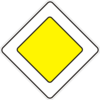

In [152]:
metl = list(data_dir.rglob('Meta/*'))
PIL.Image.open(str(random.choice(metl)))

In [24]:
list(data_dir.rglob('Test/*'))[:5]

[WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Test/00000.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Test/00001.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Test/00002.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Test/00003.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Test/00004.png')]

In [25]:
print('Number of Test images: {}'.format(len(list(data_dir.rglob('Test/*.png')))))

Number of Test images: 12630


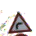

In [26]:
tesl = list(data_dir.rglob('Test/*'))
PIL.Image.open(str(random.choice(tesl)))

In [27]:
list(data_dir.glob('Train/*'))[:5]

[WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Train/0'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Train/1'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Train/10'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Train/11'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/Train/12')]

In [28]:
len(list(data_dir.glob('Train/*')))

43

In [29]:
tl = list(data_dir.glob('Train/*'))
tdict = {}
for i in tl:
  tdict[i.name] = len(list(i.glob('*.png')))

In [30]:
tdict

{'0': 210,
 '1': 2220,
 '10': 2010,
 '11': 1320,
 '12': 2100,
 '13': 2160,
 '14': 780,
 '15': 630,
 '16': 420,
 '17': 1110,
 '18': 1200,
 '19': 210,
 '2': 2250,
 '20': 360,
 '21': 330,
 '22': 390,
 '23': 510,
 '24': 270,
 '25': 1500,
 '26': 600,
 '27': 240,
 '28': 540,
 '29': 270,
 '3': 1410,
 '30': 450,
 '31': 780,
 '32': 240,
 '33': 689,
 '34': 420,
 '35': 1200,
 '36': 390,
 '37': 210,
 '38': 2070,
 '39': 300,
 '4': 1980,
 '40': 360,
 '41': 240,
 '42': 240,
 '5': 1860,
 '6': 420,
 '7': 1440,
 '8': 1410,
 '9': 1470}

In [31]:
print('Number of Train images: {}'.format(sum(tdict.values())))

Number of Train images: 39209


In [32]:
tral = list(data_dir.glob('Train/*'))

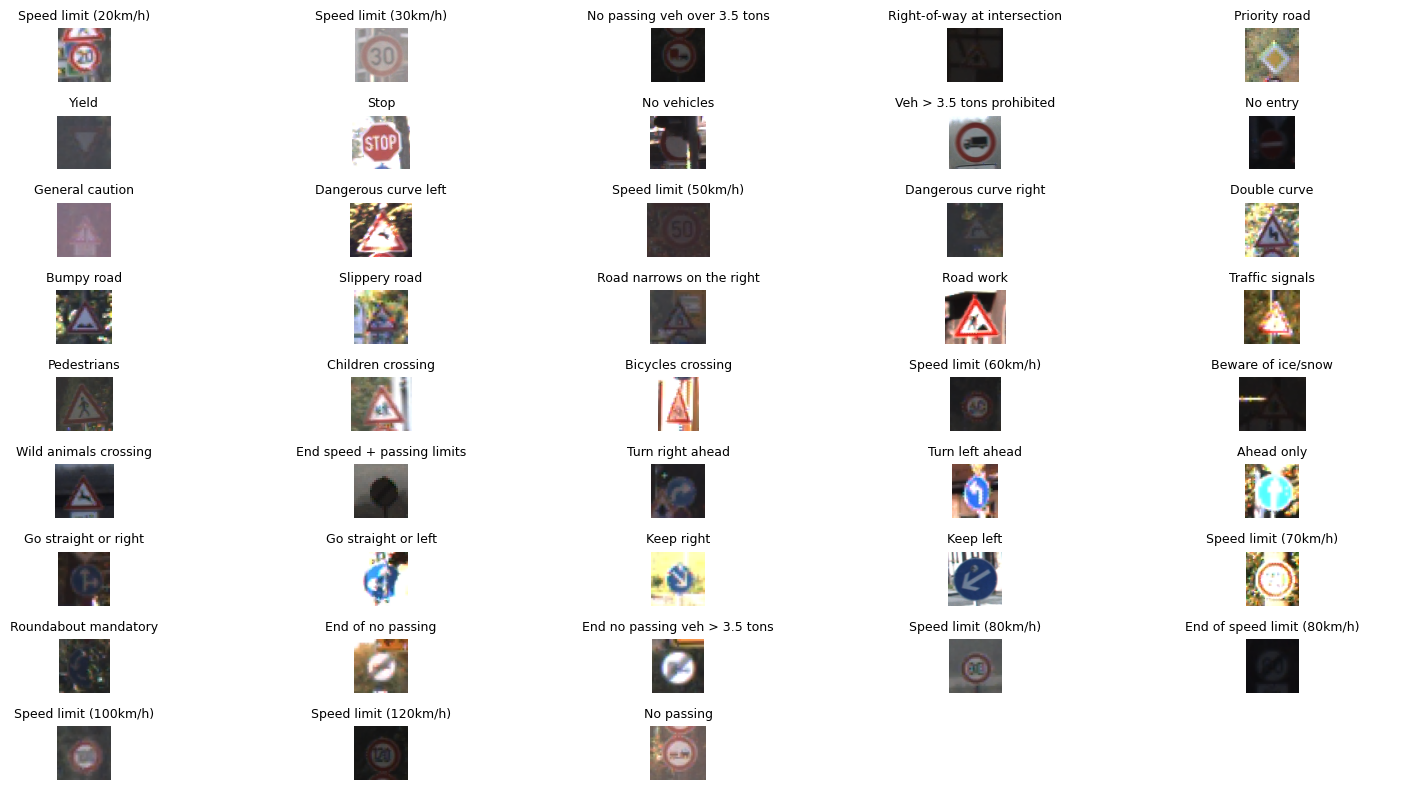

In [33]:
images_per_row = 5

fig, axes = plt.subplots(
    nrows = (len(tral) + images_per_row - 1) // images_per_row,
    ncols = images_per_row,
    figsize = (15, 8)
)
axes = axes.flatten()

for idx, folder in enumerate(tral):
    for image_path in folder.glob('*.png'):
        img = Image.open(image_path)
        axes[idx].imshow(img)
        label = classes.get(int(folder.name), f"Class {folder.name}")
        axes[idx].set_title(label, fontsize=9)
        axes[idx].axis('off')
        break
for ax in axes[len(tral):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


#Data Augmentation

In [34]:
max(tdict.values())

2250

In [35]:
min(tdict.values())

210

In [36]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    brightness_range = [0.8, 1.2],
    horizontal_flip = True,
    fill_mode = 'nearest'
)

datagen2 = ImageDataGenerator(
    rotation_range = 8,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    brightness_range = [0.8, 1.2],
    horizontal_flip = False,
    fill_mode = 'nearest'
)

In [37]:
augmented_dir = pathlib.Path('C:/Users/HP/Documents/Codebasics/GTSCDS/TrafficAugmented')
tl = list(data_dir.glob('Train/*'))

for i in tl:
  l1 = list(i.glob('*.png'))
  if len(l1) <= max(tdict.values()) :

      folder = augmented_dir / i.name
      limit = max(tdict.values()) - len(l1)
      print(i, limit)

      if int(i.name) not in [19, 20, 33, 34, 36, 37, 38, 39] :
        tl2 = list(folder.glob('*.png'))
        slots = limit - len(tl2)

        while len(tl2) < limit :
          sam = random.choice(l1)
          img_name = sam.name
          img = image.load_img(sam, target_size = (62, 62))
          img_array = image.img_to_array(img)
          img_array = np.expand_dims(img_array, axis = 0)

          aug_iter = datagen.flow(img_array, batch_size = random.randint(1, min(slots, 10)), save_to_dir = str(augmented_dir) + '/' + str(i.name),
                                    save_prefix = 'class' + '|' + str(i.name) + '|' + img_name.split('.')[0], save_format = 'png')
          next(aug_iter)

          tl2 = list(folder.glob('*.png'))

      else :
        tl2 = list(folder.glob('*.png'))
        slots = limit - len(tl2)

        while len(tl2) < limit :
          sam = random.choice(l1)
          img_name = sam.name
          img = image.load_img(sam, target_size = (62, 62))
          img_array = image.img_to_array(img)
          img_array = np.expand_dims(img_array, axis = 0)

          aug_iter = datagen2.flow(img_array, batch_size = random.randint(1, min(slots, 10)), save_to_dir = str(augmented_dir) + '/' + str(i.name),
                                    save_prefix = 'class' + '|' + str(i.name) + '|' + img_name.split('.')[0], save_format = 'png')
          next(aug_iter)

          tl2 = list(folder.glob('*.png'))

<>:1: SyntaxWarning:

invalid escape sequence '\D'

<>:1: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\HP\AppData\Local\Temp\ipykernel_6764\574715359.py:1: SyntaxWarning:

invalid escape sequence '\D'



C:\Users\HP\Documents\Codebasics\GTSCDS\Train\0 2040
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\1 30
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\10 240
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\11 930
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\12 150
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\13 90
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\14 1470
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\15 1620
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\16 1830
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\17 1140
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\18 1050
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\19 2040
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\2 0
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\20 1890
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\21 1920
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\22 1860
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\23 1740
C:\Users\HP\Documents\Codebasics\GTSCDS\Train\24 1980
C:\Users\HP\Documents\Codebasics\GTSCDS\T

In [38]:
#to clear files from directory
# import pathlib
# import os

# folder_path = pathlib.Path('/content/drive/My Drive/Codebasics/TrafficAugmented/19')

# files = folder_path.glob('*.png')

# for file in files:
#     try:
#         os.remove(file)
#         print(f"Deleted: {file}")
#     except Exception as e:
#         print(f"Error deleting {file}: {e}")


In [39]:
print('Total number of images: {}'.format(len(list(augmented_dir.rglob('*/*.png')))))

Total number of images: 57541


In [40]:
list(augmented_dir.rglob('*/*.png'))[:5]

[WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/TrafficAugmented/0/class_0_00000_00000_00000_0_1647.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/TrafficAugmented/0/class_0_00000_00000_00000_0_2702.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/TrafficAugmented/0/class_0_00000_00000_00000_0_3949.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/TrafficAugmented/0/class_0_00000_00000_00000_0_5051.png'),
 WindowsPath('C:/Users/HP/Documents/Codebasics/GTSCDS/TrafficAugmented/0/class_0_00000_00000_00000_0_5086.png')]

In [41]:
tl = list(data_dir.glob('Train/*'))
tdict = {}
for i in tl:
  tdict[i.name] = list(i.glob('*.png'))

In [42]:
al = list(augmented_dir.glob('*/*.png'))

for i in al:
    parts = i.name.split('|')
    if len(parts) > 1:
        key = parts[1]
        if key in tdict:
            tdict[key].append(i)

In [43]:
len(tdict['1'])

2220

In [44]:
px.bar(x = tdict.keys(), y = [len(v) for v in tdict.values()],
       width = 800, height = 500)

#Model Building

In [45]:
image_data = []
image_labels = []

for i in tdict.keys():
  for j in tdict[i]:

    try:
      image = cv2.imread(str(j))
      image_fromarray = Image.fromarray(image, 'RGB')
      resize_image = image_fromarray.resize((62, 62))
      image_data.append(np.array(resize_image))
      image_labels.append(i)

    except:
        print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 62, 62, 3) (39209,)


In [46]:
#Shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [47]:
# Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size = 0.3, random_state = 42, stratify = image_labels)

X_train = X_train/255
X_val = X_val/255

y_train = y_train.astype(int)
y_val = y_val.astype(int)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 62, 62, 3)
X_valid.shape (11763, 62, 62, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [48]:
# Building the model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(62,62,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.5),

    keras.layers.Dense(43, activation='softmax')
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [115]:
initial_lr = 0.001
epochs = 5

def lr_schedule(epoch):
    return initial_lr * (0.5 ** (epoch / (epochs * 0.5)))

lr_scheduler = LearningRateScheduler(lr_schedule)

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True,
    verbose = 1
)

opt = Adam(learning_rate=initial_lr)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = epochs,
    callbacks = [lr_scheduler, early_stop]
)


Epoch 1/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1611s 2s/step - accuracy: 0.9985 - loss: 0.0033 - val_accuracy: 0.9965 - val_loss: 0.0181 - learning_rate: 0.0010
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1552s 2s/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9968 - val_loss: 0.0176 - learning_rate: 7.5786e-04
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1587s 2s/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9973 - val_loss: 0.0157 - learning_rate: 5.7435e-04
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1681s 2s/step - accuracy: 1.0000 - loss: 3.5455e-04 - val_accuracy: 0.9974 - val_loss: 0.0159 - learning_rate: 4.3528e-04
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1885s 2s/step - accuracy: 0.9998 - loss: 5.1255e-04 - val_accuracy: 0.9972 - val_loss: 0.0170 - learning_rate: 3.2988e-04
Restoring model weights from the end of the best epoch: 3.


Model Evaluation

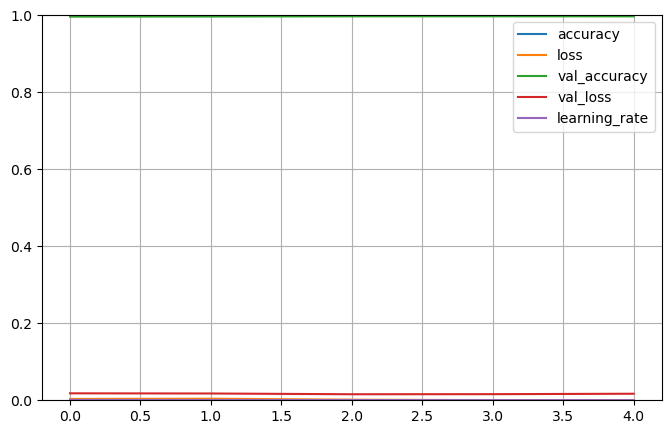

In [116]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [117]:
print(X_test.shape)


(12630, 62, 62, 3)


In [118]:
test_dir = pathlib.Path('C:/Users/HP/Documents/Codebasics/GTSCDS/Test')
labels = list(test_df['ClassId'])
testl = list(test_dir.glob('*.png'))
data =[]

for img in testl:
    try:
        image = cv2.imread(str(img))
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((62,62))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred_classes)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 138s 332ms/step
Test Data accuracy:  97.88598574821853


In [119]:
pred = model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 146s 369ms/step


In [120]:
cf = confusion_matrix(labels, pred_classes, normalize = 'true')

<Axes: >

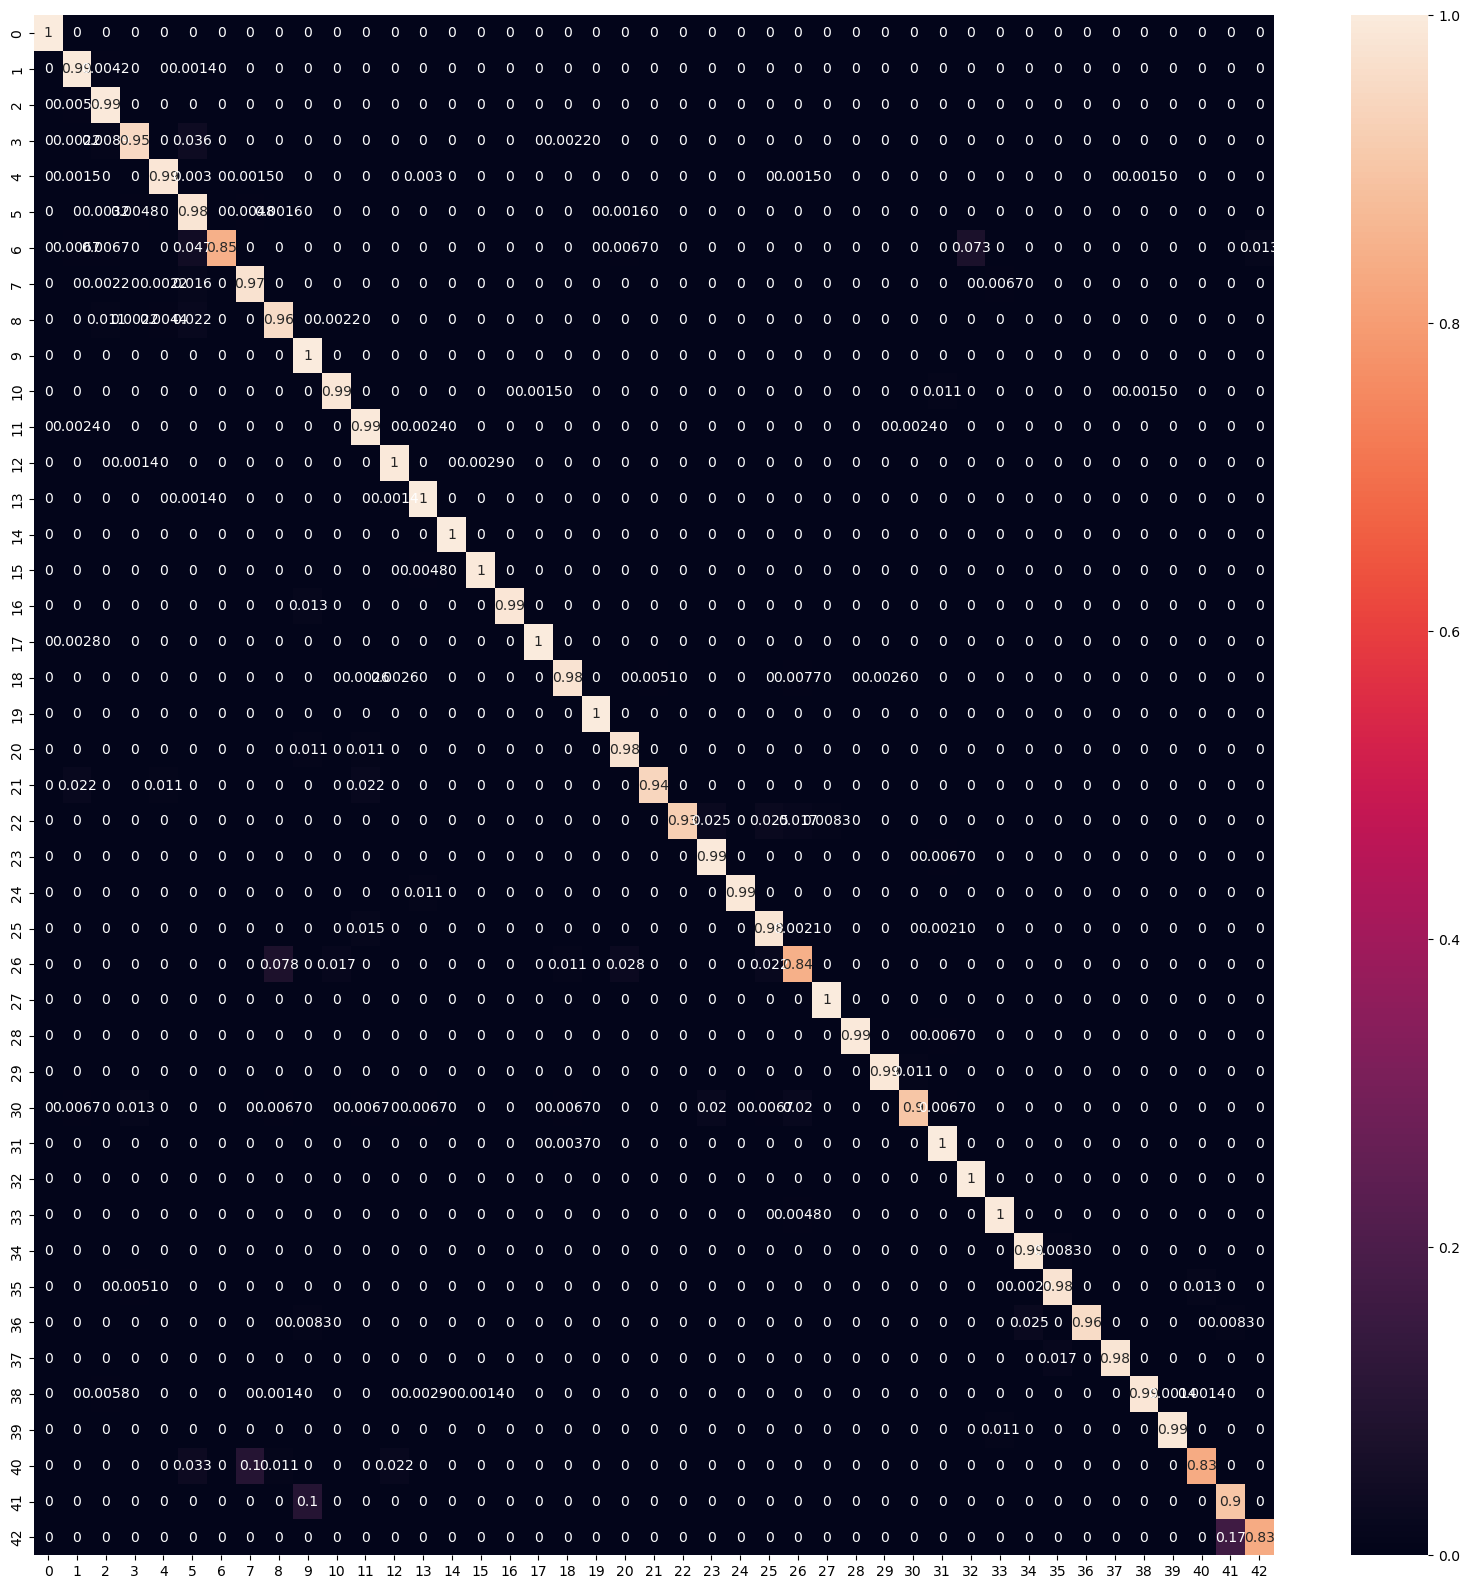

In [121]:
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [122]:
print(classification_report(labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.99      0.99       720
           2       0.97      0.99      0.98       750
           3       0.98      0.95      0.97       450
           4       0.99      0.99      0.99       660
           5       0.93      0.98      0.96       630
           6       1.00      0.85      0.92       150
           7       0.97      0.97      0.97       450
           8       0.96      0.96      0.96       450
           9       0.98      1.00      0.99       480
          10       0.99      0.99      0.99       660
          11       0.97      0.99      0.98       420
          12       0.99      1.00      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      0.99      0.99       150
          17       1.00    

Testing random Traffic Sign Images 

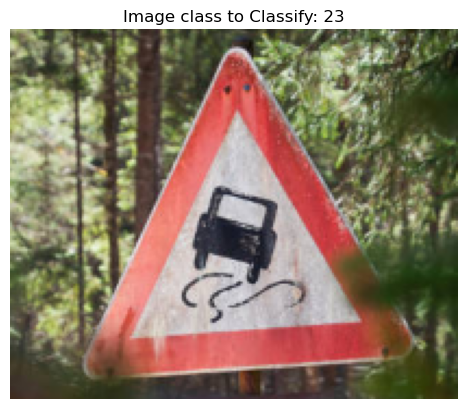

In [164]:
image = 'C:/Users/HP/Documents/Codebasics/GTSCDS/Random/' + 'slip2.png'
im = Image.open(image)
plt.imshow(im)
plt.axis('off')
plt.title(f"Image class to Classify: {img}")
plt.show()

In [132]:
image = cv2.imread('C:/Users/HP/Documents/Codebasics/GTSCDS/Random/' + 'slip2.png')
data = []
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((62,62))
data.append(np.array(resize_image))

X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


In [133]:
pred_classes

array([23], dtype=int64)

In [134]:
classes[pred_classes[0]]

'Slippery road'

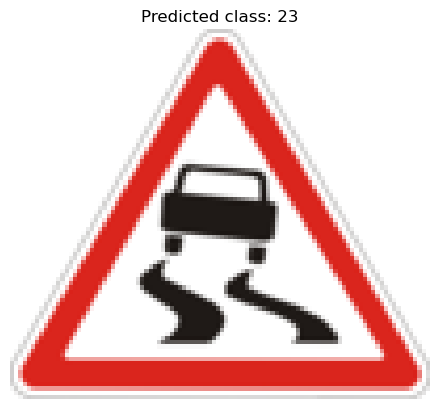

In [159]:
img = pred_classes[0]
path = list(data_dir.glob(f'Meta/{img}.png'))
img_path = str(path[0])
image = Image.open(img_path)

plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted class: {img}")
plt.show()